# Time Series Analysis - Google Stock Price (fpp2 package)

In [2]:
#install te package fpp2
install.packages('fpp2')

#load the library
library(fpp2)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
── Attaching packages ────────────────────────────────────────────── fpp2 2.4 ──
✔ ggplot2   3.3.2     ✔ fma       2.4  
✔ forecast  8.13      ✔ expsmooth 2.3  



[1] "ts"

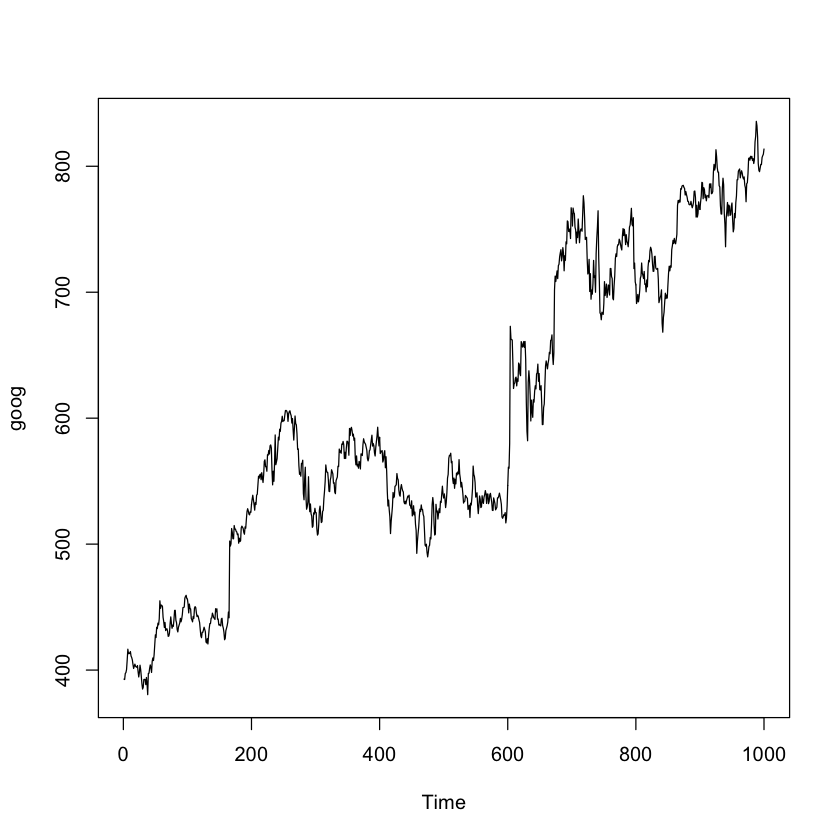

In [3]:
#data analysis
plot(goog)

class(goog)

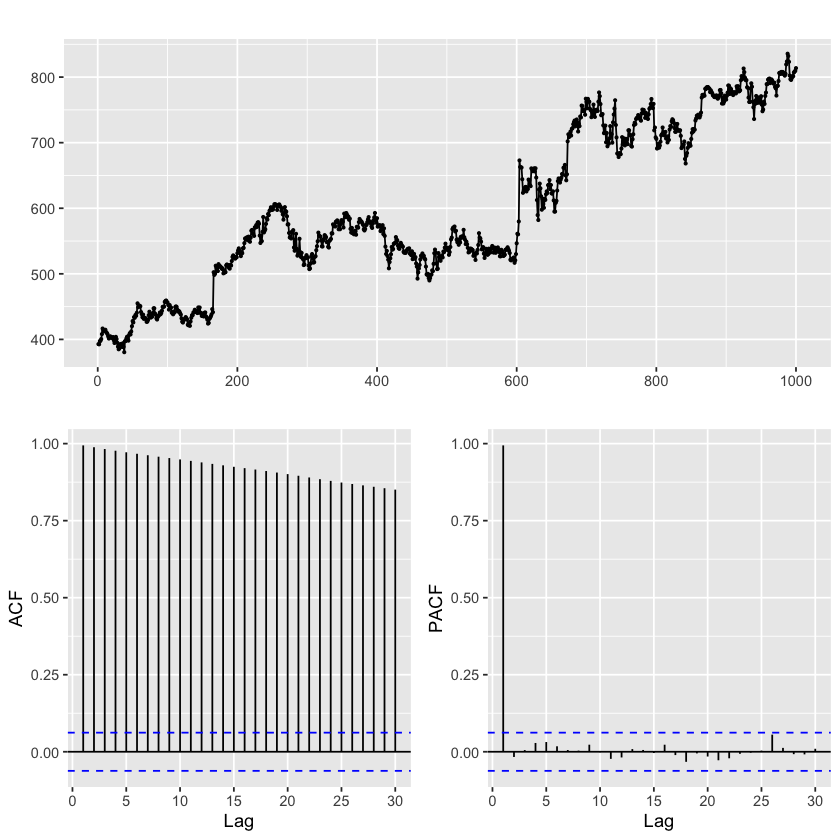

In [4]:
#One function to display it all for a ts object - plot+acf+pacf
ggtsdisplay(goog)

From ACF plot above we observe a long term linear trend. but, from pacf plot we confirm that we have no significant auto-correlation among obersvations in the data. 

We try and remove the linear trend by taking a difference.

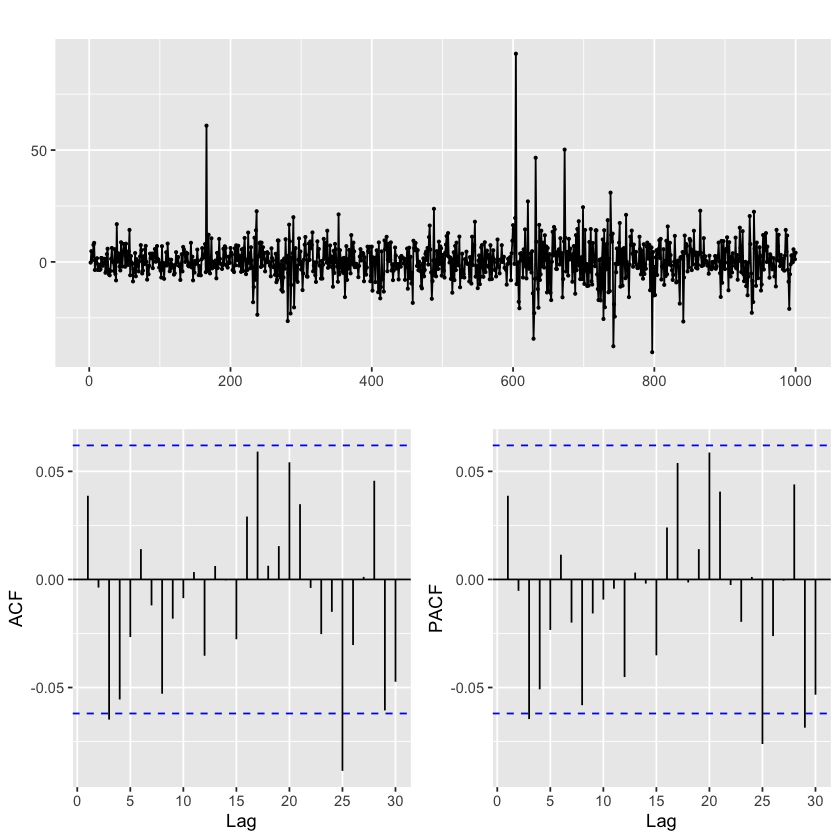

In [5]:
ggtsdisplay(diff(goog, differences=1))

We observe pretty low noise. and acf is all within limits. It seems we have white noise, in which scenario we will not have anything to modelize but trend. We have to confirm about white noise using hypothesis testing - Box Test.

In [6]:
Box.test(diff(goog), lag=10)


	Box-Pierce test

data:  diff(goog)
X-squared = 13.038, df = 10, p-value = 0.2216


In [7]:
Box.test(diff(goog), lag=25)


	Box-Pierce test

data:  diff(goog)
X-squared = 32.569, df = 25, p-value = 0.1422


Based on p-value, we cannot reject H0, which means we have white noise and thus, there is nothing to modelize in this data but trend using Simple Exponential Smoothing. 

In [8]:
#extract traing and testing sets
train_set=head(goog, n=995)
test_set=tail(goog, n=5)

Test different SES models - SES, damped=T/F

In [9]:
fit1=holt(train_set, h=5, damped=FALSE) 
fit2=holt(train_set, h=5, damped=TRUE)

Test ARIMA and NN Models and plot respective forecasts

In [13]:
fit3=auto.arima(train_set)
prev3=forecast(fit3, h=5)

fit4=nnetar(train_set)
prev4=forecast(fit4, h=5)

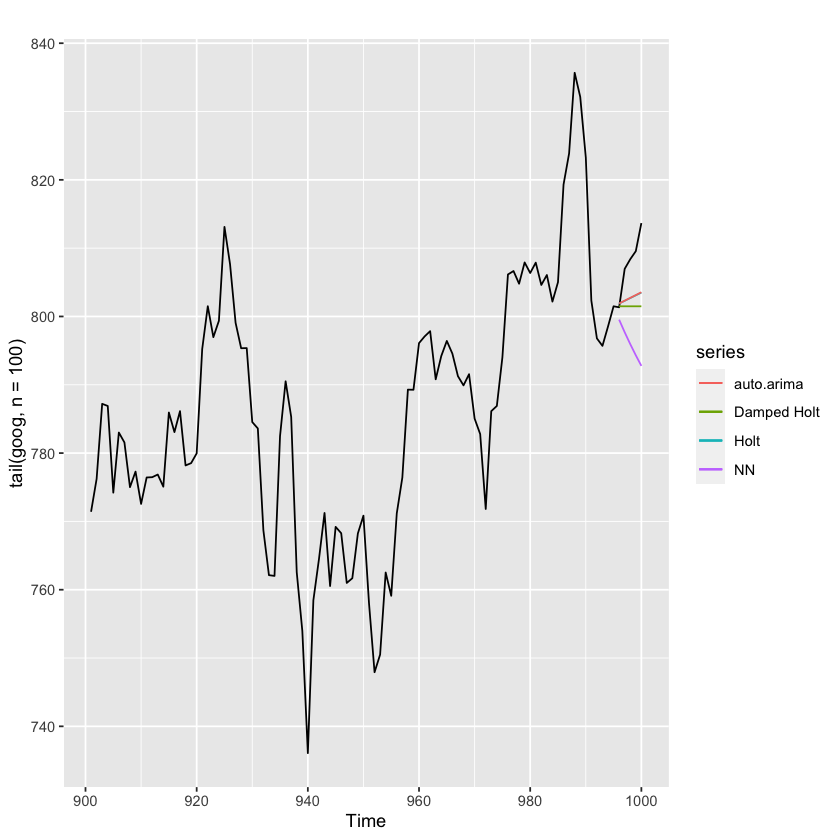

In [14]:
#plot to see the fits
autoplot(tail(goog, n=100)) + 
    autolayer(fit1$mean,series="Holt") + 
    autolayer(fit2$mean, series="Damped Holt") +
    autolayer(prev3$mean, series="auto.arima") +
    autolayer(prev4$mean, series="NN")

Forecasting seems to be not very efficient, what is not surprising since the only pattern we observe is a trend which is essentially on a long term. We can anyow comapare the models which we fitted.

In [16]:
cat('Holt: ',sqrt(mean((fit1$mean-test_set)^2)),'\n')
cat('Damped Holt: ',sqrt(mean((fit2$mean-test_set)^2)),'\n')
cat('auto.arima: ',sqrt(mean((prev3$mean-test_set)^2)),'\n')
cat('NN: ',sqrt(mean((prev4$mean-test_set)^2)),'\n')

Holt:  6.322007 
Damped Holt:  7.630459 
auto.arima:  6.289618 
NN:  13.51503 


## Auto Arima Seems to be the best model.